## Simple Square Root

TODO: Compare to bisection method

Simple algorithm for the square root of $k$, where $k>0$:

$x_{t+1}=\frac{1}{2}(x_t+\frac{k}{x_t})$

Derivation:

$x^2=k$

$x=\frac{k}{x}$

$\frac{x}{2}=\frac{k}{2x}=\frac{1}{2}(\frac{k}{x})$

$\frac{x}{2}+\frac{x}{2}=\frac{1}{2}(\frac{k}{x})+\frac{x}{2}$

$x=\frac{1}{2}(x+\frac{k}{x})$

In [ ]:
import math

def sqrt(k: float, x0: float, t: int) -> float:
    """
    Estimate the square root of k with t iterations
    :param k: a positive number
    :param x0: initial guess of the square root of k
    :param t: number of iterations
    :return: the estimated square root of k
    """
    if t == 0:
        return x0
    prev = sqrt(k, x0, t - 1)
    return 0.5*(prev + (k / prev))

print("Estimate:", sqrt(7, 1, 5))
print("Exact:", math.sqrt(7))

How fast do different values of $x_0$ converge to the square root?

In [ ]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from typing import List

def sqrt_iterations(k: float, prev: float, target: float, tolerance: float) -> List[float]:
    """
    Estimate the square root of k until within tolerance
    :param k: a positive number
    :param prev: initial estimate
    :param target: actual square root
    :param tolerance: desired distance from target
    :return: a list of estimates from each iteration
    """
    new_value = 0.5*(prev + (k / prev))
    if abs(new_value - target) <= tolerance:
        return [new_value]
    return [new_value] + sqrt_iterations(k, new_value, target, tolerance)

plt.figure("sqrt")
plt.plot([1.] + sqrt_iterations(7, 1, math.sqrt(7), 0.00001))
plt.plot([5.] + sqrt_iterations(7, 5, math.sqrt(7), 0.00001))
plt.plot([50.] + sqrt_iterations(7, 50, math.sqrt(7), 0.00001))
plt.xlabel("Iteration")
plt.ylabel("Distance from target")
plt.show()

## Newton's Method

A centuries-old method for finding the zeros of a nonlinear univariate function.

For a function $f(x)$, at any point $x_t$, we can approximate the value of $f(x_{t+1})$ where $\Delta x=x_{t+1}-x_t$:

$f(x_{t+1})=f(x_t+\Delta x)\approx f(x_t)+f^{'}(x_t)\Delta x$

To get the value at the next point, take the current value and add the slope multiplied by the distance to the next point.

Solve for $x_{t+1}$:

$x_{t+1}\approx x_t+\frac{f(x_{t+1})-f(x_t)}{f^{'}(x_t)}$

To find the root, we're always hoping that $f(x_{t+1})$ will be 0. So we can approximate:

$x_{t+1}=x_t-\frac{f(x_t)}{f^{'}(x_t)}$

Consider the equation $x^x=e^x, x\in[0, \infty)$. There are two roots, $0$ and $e$.

To find them we can use $f(x)=x^x-e^x=0$.

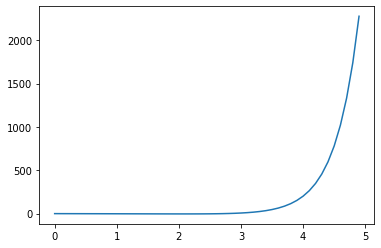

In [12]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy
import sympy as sp

x = sp.symbols('x')

def newton(equation: sp.Expr, derivative: sp.Expr, prev: float, tolerance: float) -> List[float]:
    """
    Attempt to find a root of equation within tolerance
    :param equation: an equation of x equal to 0
    :param derivative: the derivative of equation
    :param prev: initial estimate
    :param tolerance: desired distance from 0
    :return: a list of estimates from each iteration
    """
    new_value = prev - (equation.subs(x, prev).evalf() / derivative.subs(x, prev).evalf())
    if new_value <= tolerance:
        return [new_value]
    return [new_value] + newton(equation, new_value, tolerance)

plt.figure("newton1")
plt.plot([1.] + newton(7, 1, math.sqrt(7), 0.00001))
plt.plot([5.] + sqrt_iterations(7, 5, math.sqrt(7), 0.00001))
plt.plot([50.] + sqrt_iterations(7, 50, math.sqrt(7), 0.00001))
plt.xlabel("Iteration")
plt.ylabel("Distance from target")
plt.show()